In [16]:
import importlib
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [28]:
import classes, utils, iv_models
_ = importlib.reload(classes)
_ = importlib.reload(utils)
_ = importlib.reload(iv_models)

from classes import Ticker, TickerSet, OptionChain
from utils import get_errors_for_models
from iv_models import BasicMidIVPolynomial

In [19]:
ts = TickerSet("20210805 15:15:00", "20210806 10:00:00")#, tickers=['INDHOTEL', 'INDIGO', 'INDUSINDBK', 'INDUSTOWER', 'INFY', 'IOC'])

globbing ./data/*/*_AARTIIND21AUG*.csv
loading data from ./data/20210805/influxOP_AARTIIND21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_AARTIIND21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_ABFRL21AUG*.csv
loading data from ./data/20210811/influxOP_ABFRL21AUG_20210811.csv
2021-08-26 20:00:00
loading data from ./data/20210805/influxOP_ABFRL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ABFRL21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_ACC21AUG*.csv
loading data from ./data/20210805/influxOP_ACC21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ACC21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_ADANIENT21AUG*.csv
loading data from ./data/20210805/influxOP_ADANIENT21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ADANIENT21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_ADANIPORTS21AUG*.csv
loading data from ./

loading data from ./data/20210806/influxOP_COALINDIA21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_COFORGE21AUG*.csv
loading data from ./data/20210805/influxOP_COFORGE21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_COFORGE21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_COLPAL21AUG*.csv
loading data from ./data/20210805/influxOP_COLPAL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_COLPAL21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_CONCOR21AUG*.csv
loading data from ./data/20210805/influxOP_CONCOR21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_CONCOR21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_COROMANDEL21AUG*.csv
loading data from ./data/20210805/influxOP_COROMANDEL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_COROMANDEL21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_CUB21AUG*.csv
loading 

2021-08-26 20:00:00
globbing ./data/*/*_IDFCFIRSTB21AUG*.csv
loading data from ./data/20210805/influxOP_IDFCFIRSTB21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_IDFCFIRSTB21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_IGL21AUG*.csv
loading data from ./data/20210805/influxOP_IGL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_IGL21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_INDHOTEL21AUG*.csv
loading data from ./data/20210805/influxOP_INDHOTEL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_INDHOTEL21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_INDIGO21AUG*.csv
loading data from ./data/20210805/influxOP_INDIGO21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_INDIGO21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_INDUSINDBK21AUG*.csv
loading data from ./data/20210805/influxOP_INDUSINDBK21AUG_20210805.csv
2021-0

2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_NAVINFLUOR21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_NESTLEIND21AUG*.csv
loading data from ./data/20210805/influxOP_NESTLEIND21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_NESTLEIND21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_NMDC21AUG*.csv
loading data from ./data/20210805/influxOP_NMDC21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_NMDC21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_NTPC21AUG*.csv
loading data from ./data/20210805/influxOP_NTPC21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_NTPC21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_ONGC21AUG*.csv
loading data from ./data/20210805/influxOP_ONGC21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ONGC21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_PAGEIND21AUG*.csv
loading

globbing ./data/*/*_TRENT21AUG*.csv
loading data from ./data/20210805/influxOP_TRENT21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_TRENT21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_TVSMOTOR21AUG*.csv
loading data from ./data/20210805/influxOP_TVSMOTOR21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_TVSMOTOR21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_UBL21AUG*.csv
loading data from ./data/20210805/influxOP_UBL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_UBL21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_ULTRACEMCO21AUG*.csv
loading data from ./data/20210805/influxOP_ULTRACEMCO21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ULTRACEMCO21AUG_20210806.csv
2021-08-26 20:00:00
globbing ./data/*/*_UPL21AUG*.csv
loading data from ./data/20210805/influxOP_UPL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./dat

In [29]:
oc_pairs = ts.get_option_chain_pairs()

model_1 = BasicMidIVPolynomial(2)
model_2 = BasicMidIVPolynomial(4)

models = [model_1, model_2]

In [30]:
model_errors = get_errors_for_models(oc_pairs, models)

/Users/garg/code/irage/irage-assignment/work/classes.py:38: RankWarning: Polyfit may be poorly conditioned
  self.iv_model.fit(self)
/Users/garg/code/irage/irage-assignment/work/classes.py:38: RankWarning: Polyfit may be poorly conditioned
  self.iv_model.fit(self)
/Users/garg/code/irage/irage-assignment/work/classes.py:38: RankWarning: Polyfit may be poorly conditioned
  self.iv_model.fit(self)
/Users/garg/code/irage/irage-assignment/work/classes.py:38: RankWarning: Polyfit may be poorly conditioned
  self.iv_model.fit(self)


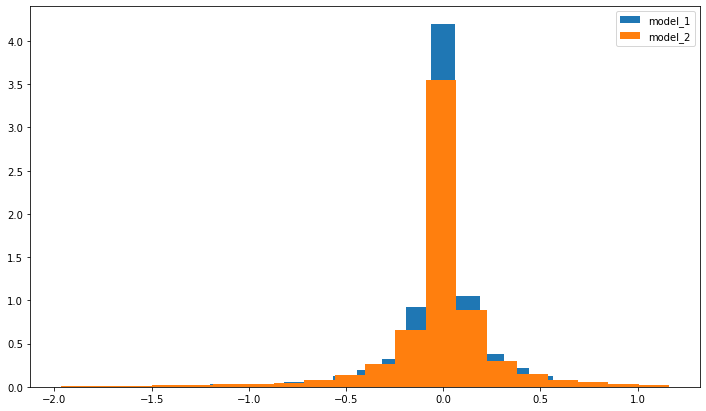

In [31]:
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(12, 7)

for tickerwise_e, aggregated_e in model_errors:
    axs.hist(aggregated_e['ALL'], density=True, bins=20)
    
axs.legend([f'model_{i+1}' for i in range(len(model_errors))])

In [36]:
rows = []
for i, (tickerwise_e, aggregated_e) in enumerate(model_errors):
    row = {
        'model': f'model_{i+1}',
        'mae' : np.mean(np.abs(aggregated_e['ALL'])),
        'rmse' : np.sqrt(np.mean((aggregated_e['ALL'])**2)),
    } 
    rows.append(row)

In [37]:
pd.DataFrame(rows)

,model,mae,rmse
0,model_1,0.137879,0.248661
1,model_2,0.156605,0.288681
